In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pathlib
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras

import warnings
# warnings.fiterwarnings("ignore")

- Blues
- Classical
- Country
- Disco
- Hiphop
- Jazz
- Metal
- Pop
- Reggae
- Rock

In [7]:
genres = ["blues", "classical", "country", "disco", "hiphop",
          "jazz", "metal", "pop", "reggae", "rock"]

In [10]:
cmap = plt.get_cmap("inferno")

plt.figure(figsize=(10, 10))
for g in genres:
    pathlib.Path(f"img_data/{g}").mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f"genres_original/{g}"):
        try:
            songname = f"genres_original/{g}/{filename}"
            y, sr = librosa.load(songname, mono=True, duration=5)
            plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap,
                        sides="default", mode="default", scale="dB")
            plt.axis("off")
            plt.savefig(f"img_data/{g}/{filename[:-3].replace('.', '')}.png")
            plt.clf()
        except:
            pass

<Figure size 720x720 with 0 Axes>

In [11]:
header = ['filename', 'chroma_stft', 'rmse', 'spectral_centroid',
         'spectral_bandwidth', 'rolloff', 'zero_crossing_rate',
         'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
         'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
         'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
         'mfcc18', 'mfcc19', 'mfcc20', 'label']

In [43]:
with open("data.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
for g in genres:
    for filename in os.listdir(f"genres_original/{g}"):
        try:
            songname = f"genres_original/{g}/{filename}"
            y, sr = librosa.load(songname, mono=True, duration=30)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)

            a = f"{filename} {np.mean(chroma_stft)} {np.mean(rmse)}"
            a += f" {np.mean(spec_cent)} {np.mean(spec_bw)}"
            a += f" {np.mean(rolloff)} {np.mean(zcr)}"

            for e in mfcc:
                a += f" {np.mean(e)}"
            a += f" {g}"

            with open("data.csv", "a", newline="") as f:
                writer = csv.writer(f)
                writer.writerow(a.split())
        except:
            pass

In [44]:
df = pd.read_csv("data.csv")
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [45]:
df.shape

(999, 28)

In [46]:
df = df.drop(["filename"], axis=1)

In [47]:
genre_list = df.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
print(f"train size: {len(y_train)}")
print(f"test size: {len(y_test)}")
X_train[10]

train size: 799
test size: 200


array([ 0.93804906,  0.7817821 , -0.19986649, -0.02971315, -0.01269267,
       -0.74931576,  0.53055287, -0.02273699, -0.65830351,  0.63448757,
       -0.46725684,  1.2357141 , -0.48630526,  1.48493694, -0.38796614,
        1.49713636, -0.32148877,  1.33064134, -0.27559859,  2.44395589,
        0.88011913,  2.49784942,  0.94761342,  2.48229123,  0.50566452,
        0.62181654])

## THE MODEL

In [51]:
from keras.models import Sequential
from keras import layers as ly

In [52]:
model = Sequential([
    ly.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    ly.Dense(128, activation="relu"),
    ly.Dense(64, activation="relu"),
    ly.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [53]:
his = model.fit(X_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
7/7 [==============================] - 0s 8ms/step - loss: 2.1923 - accuracy: 0.2365
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 1.8844 - accuracy: 0.3567
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 1.6540 - accuracy: 0.3930
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 1.4531 - accuracy: 0.4806
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 1.3018 - accuracy: 0.5544
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 1.1948 - accuracy: 0.5932
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 1.1066 - accuracy: 0.6183
Epoch 8/20
7/7 [==============================] - 0s 3ms/step - loss: 1.0317 - accuracy: 0.6521
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.9689 - accuracy: 0.6771
Epoch 10/20
7/7 [==============================] - 0s 3ms/step - loss: 0.9250 - accuracy: 0.6859
Epoch 11/20
7/7 [======================

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.9927 - accuracy: 0.6500


In [62]:
his.history.keys()

dict_keys(['loss', 'accuracy'])

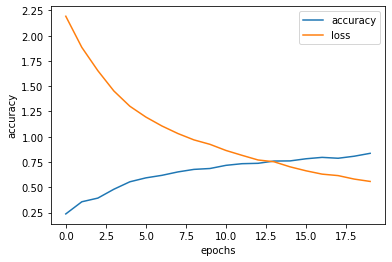

In [63]:
plt.plot(his.history["accuracy"])
plt.plot(his.history["loss"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "loss"])
plt.show()

In [64]:
x_val = X_train[:200]
part_x_train = X_train[200:]

y_val = y_train[:200]
part_y_train = y_train[200:]

In [65]:
model = Sequential([
    ly.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    ly.Dense(256, activation="relu"),
    ly.Dense(128, activation="relu"),
    ly.Dense(64, activation="relu"),
    ly.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [66]:
history = model.fit(part_x_train, part_y_train, epochs=30, batch_size=512,
                   validation_data=(x_val, y_val))
res = model.evaluate(X_test, y_test)

Epoch 1/30
2/2 [==============================] - 0s 75ms/step - loss: 2.3163 - accuracy: 0.1002 - val_loss: 2.1656 - val_accuracy: 0.3150
Epoch 2/30
2/2 [==============================] - 0s 15ms/step - loss: 2.1417 - accuracy: 0.3406 - val_loss: 2.0501 - val_accuracy: 0.3600
Epoch 3/30
2/2 [==============================] - 0s 13ms/step - loss: 1.9931 - accuracy: 0.3773 - val_loss: 1.9170 - val_accuracy: 0.3450
Epoch 4/30
2/2 [==============================] - 0s 15ms/step - loss: 1.8211 - accuracy: 0.3940 - val_loss: 1.7836 - val_accuracy: 0.3650
Epoch 5/30
2/2 [==============================] - 0s 21ms/step - loss: 1.6588 - accuracy: 0.4207 - val_loss: 1.6643 - val_accuracy: 0.3950
Epoch 6/30
2/2 [==============================] - 0s 16ms/step - loss: 1.5191 - accuracy: 0.4407 - val_loss: 1.5694 - val_accuracy: 0.4700
Epoch 7/30
2/2 [==============================] - 0s 12ms/step - loss: 1.4083 - accuracy: 0.4608 - val_loss: 1.4958 - val_accuracy: 0.4850
Epoch 8/30
2/2 [===========

In [67]:
res

[1.0289015769958496, 0.6499999761581421]

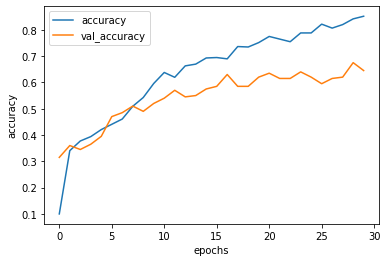

In [68]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

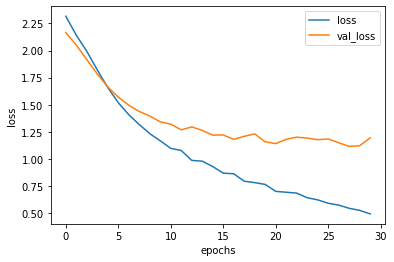

In [69]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["loss", "val_loss"])
plt.show()

In [70]:
preds = model.predict(X_test)

In [71]:
preds[0].shape

(10,)

In [72]:
np.argmax(preds[0])

8